In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

In [26]:
from google_play_scraper import reviews_all, Sort
import pandas as pd
import numpy as np

def fetch_reviews(app_id, lang='en', country='in', num_reviews=100000):
    all_reviews = []
    count = 0
    while count < num_reviews:

        reviews_data = reviews_all(
            app_id,
            sleep_milliseconds=0,
            lang=lang,
            country=country,
            sort=Sort.NEWEST
        )

        if not reviews_data:
            break


        all_reviews.extend(reviews_data)
        count += len(reviews_data)
        print(f"Fetched {count} reviews so far...")


        if len(reviews_data) < 2000:
            break

    return all_reviews

app_id = 'cricketgames.hitwicket.strategy'
reviews_data = fetch_reviews(app_id, num_reviews=100000)

df_reviews = pd.DataFrame(np.array(reviews_data), columns=['review'])


df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))

print(df_reviews.head())


Fetched 32350 reviews so far...
Fetched 64700 reviews so far...
Fetched 97050 reviews so far...
Fetched 129400 reviews so far...
                               reviewId       userName  \
0  971d93a1-07ce-4607-ba16-3d11bdbb552e  A Google user   
1  8d96c2ea-3741-45e3-aaad-006341448871  A Google user   
2  be0d56f8-de6a-4c5c-8f4c-fbf42c3a7953  A Google user   
3  a2070a1a-55bc-4042-aa5d-9a00db82cc5e  A Google user   
4  c29b4225-defc-4e8c-b09d-9e3881baeda2  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                             content  score  thumbsUpCount  \
0                               Good      5              0   
1                          nice game      5              0   

In [27]:
from google_play_scraper import reviews_all, Sort
import pandas as pd

def fetch_reviews(app_id, lang='en', country='in', num_reviews=100000):
    all_reviews = []
    count = 0
    while count < num_reviews:
        # Fetch reviews from the Play Store
        reviews_data = reviews_all(
            app_id,
            sleep_milliseconds=0,
            lang=lang,
            country=country,
            sort=Sort.NEWEST  # Get the newest reviews
        )

        if not reviews_data:
            break

        # Append fetched reviews to the list
        all_reviews.extend(reviews_data)
        count += len(reviews_data)
        print(f"Fetched {count} reviews so far...")

        # Stop if the number of reviews fetched is less than expected
        if len(reviews_data) < 2000:
            break

    return all_reviews

app_id = 'cricketgames.hitwicket.strategy'
reviews_data = fetch_reviews(app_id, num_reviews=100000)

# Convert the list of reviews to a DataFrame
df_reviews = pd.DataFrame(reviews_data)

# Display the first few rows of the DataFrame
print(df_reviews.head())

# Display information about the DataFrame
df_reviews.info()


Fetched 32350 reviews so far...
Fetched 64700 reviews so far...
Fetched 97050 reviews so far...
Fetched 129400 reviews so far...
                               reviewId       userName  \
0  971d93a1-07ce-4607-ba16-3d11bdbb552e  A Google user   
1  8d96c2ea-3741-45e3-aaad-006341448871  A Google user   
2  be0d56f8-de6a-4c5c-8f4c-fbf42c3a7953  A Google user   
3  a2070a1a-55bc-4042-aa5d-9a00db82cc5e  A Google user   
4  c29b4225-defc-4e8c-b09d-9e3881baeda2  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                             content  score  thumbsUpCount  \
0                               Good      5              0   
1                          nice game      5              0   

In [28]:
df_reviews['score'].value_counts()

,count
score,
5,80136
1,23380
4,13532
3,7172
2,5180


<Axes: ylabel='count'>

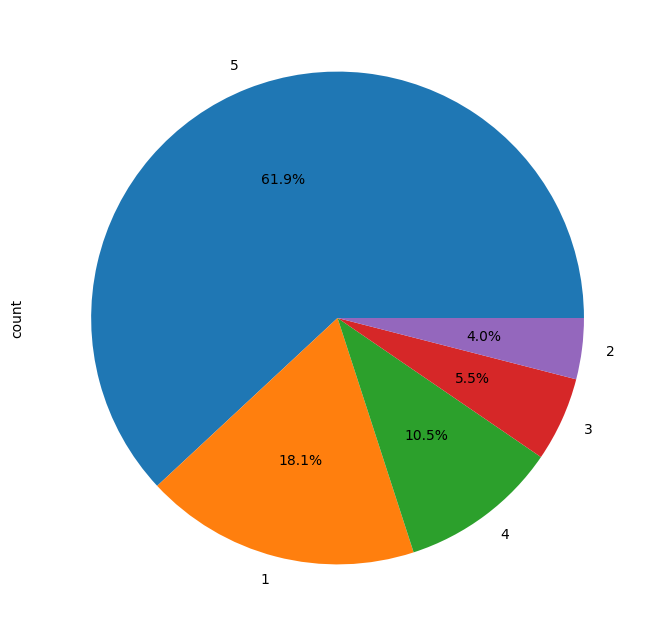

In [29]:
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [30]:
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [31]:
df_reviews_content.head()

,content,score
0,Good,5
1,nice game,5
2,Good game for me,5
3,At level 42.. Still veryaddictive,5
4,Good game,5


In [36]:
from google_play_scraper import reviews_all, Sort
import pandas as pd

def fetch_reviews(app_id, lang='en', country='in', num_reviews=100000):
    all_reviews = []
    count = 0
    while count < num_reviews:
        reviews_data = reviews_all(
            app_id,
            sleep_milliseconds=0,
            lang=lang,
            country=country,
            sort=Sort.NEWEST
        )

        if not reviews_data:
            break

        all_reviews.extend(reviews_data)
        count += len(reviews_data)
        print(f"Fetched {count} reviews so far...")

        if len(reviews_data) < 2000:
            break

    return all_reviews

def classify_sentiment(rating):
    if rating > 3 and rating <= 5:
        return 'positive'
    elif rating <= 3 and rating > 1:
        return 'negative'
    elif rating <= 1:
        return 'neutral'
    else:
        return 'mixed'

# Fetch reviews
app_id = 'cricketgames.hitwicket.strategy'
reviews_data = fetch_reviews(app_id, num_reviews=100000)

# Convert reviews to DataFrame
df_reviews = pd.DataFrame(reviews_data)

# Perform sentiment analysis based on ratings
df_reviews['sentiment'] = df_reviews['score'].apply(classify_sentiment)

# Display the first few rows of the DataFrame with sentiment
print(df_reviews.head())

# Display distribution of sentiment categories
print(df_reviews['sentiment'].value_counts())

# Optional: Save the DataFrame to a CSV file
df_reviews.to_csv('hitwicket_reviews_with_sentiment.csv', index=False)


Fetched 32350 reviews so far...
Fetched 64700 reviews so far...
Fetched 97050 reviews so far...
Fetched 129400 reviews so far...
                               reviewId       userName  \
0  4c18ceb0-b2a4-4375-b6f0-ee475b7166f9  A Google user   
1  971d93a1-07ce-4607-ba16-3d11bdbb552e  A Google user   
2  8d96c2ea-3741-45e3-aaad-006341448871  A Google user   
3  be0d56f8-de6a-4c5c-8f4c-fbf42c3a7953  A Google user   
4  a2070a1a-55bc-4042-aa5d-9a00db82cc5e  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  I'm play this game since almost a year.But Til...      3              0   
1                            

Fetched 32350 reviews so far...
Fetched 64700 reviews so far...
Fetched 97050 reviews so far...
Fetched 129400 reviews so far...
                               reviewId       userName  \
0  4c18ceb0-b2a4-4375-b6f0-ee475b7166f9  A Google user   
1  971d93a1-07ce-4607-ba16-3d11bdbb552e  A Google user   
2  8d96c2ea-3741-45e3-aaad-006341448871  A Google user   
3  be0d56f8-de6a-4c5c-8f4c-fbf42c3a7953  A Google user   
4  a2070a1a-55bc-4042-aa5d-9a00db82cc5e  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  I'm play this game since almost a year.But Til...      3              0   
1                            

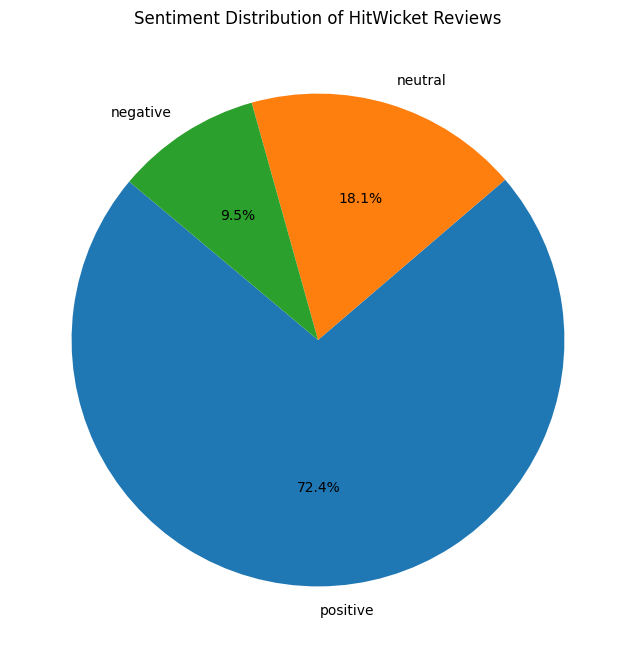

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from google_play_scraper import reviews_all, Sort

def fetch_reviews(app_id, lang='en', country='in', num_reviews=100000):
    all_reviews = []
    count = 0
    while count < num_reviews:
        reviews_data = reviews_all(
            app_id,
            sleep_milliseconds=0,
            lang=lang,
            country=country,
            sort=Sort.NEWEST
        )

        if not reviews_data:
            break

        all_reviews.extend(reviews_data)
        count += len(reviews_data)
        print(f"Fetched {count} reviews so far...")

        if len(reviews_data) < 2000:
            break

    return all_reviews

def classify_sentiment(rating):
    if rating > 3 and rating <= 5:
        return 'positive'
    elif rating <= 3 and rating > 1:
        return 'negative'
    elif rating <= 1:
        return 'neutral'
    else:
        return 'mixed'

# Fetch reviews
app_id = 'cricketgames.hitwicket.strategy'
reviews_data = fetch_reviews(app_id, num_reviews=100000)

# Convert reviews to DataFrame
df_reviews = pd.DataFrame(reviews_data)

# Perform sentiment analysis based on ratings
df_reviews['sentiment'] = df_reviews['score'].apply(classify_sentiment)

# Display the first few rows of the DataFrame with sentiment
print(df_reviews.head())

# Display distribution of sentiment categories
sentiment_counts = df_reviews['sentiment'].value_counts()
print(sentiment_counts)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of HitWicket Reviews')
plt.show()

# Optional: Save the DataFrame to a CSV file
df_reviews.to_csv('hitwicket_reviews_with_sentiment.csv', index=False)


In [38]:
# Group by sentiment and review score, and count the number of reviews in each group
sentiment_score_counts = df_reviews.groupby(['sentiment', 'score'])['content'].count().reset_index()

# Rename columns for clarity
sentiment_score_counts.columns = ['Sentiment', 'Review Score', 'Count']

# Display the grouped and counted DataFrame
print(sentiment_score_counts)


  Sentiment  Review Score  Count
0  negative             2   5180
1  negative             3   7176
2   neutral             1  23380
3  positive             4  13532
4  positive             5  80132


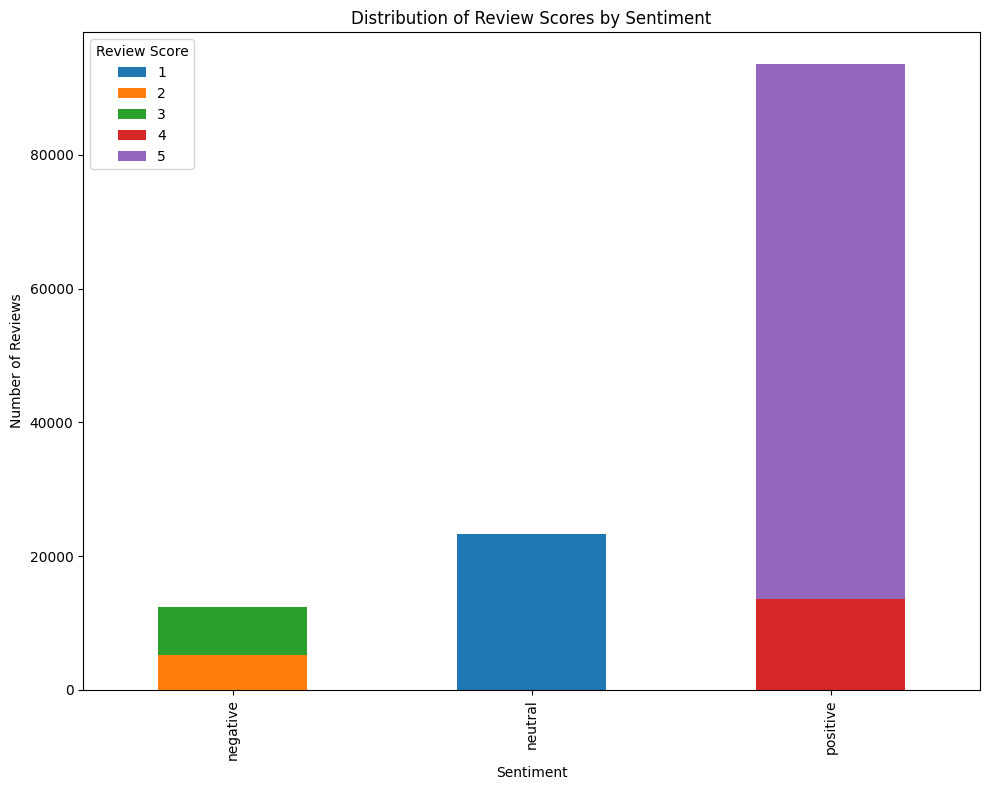

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_reviews' is your DataFrame containing 'sentiment' and 'score'
# Create the crosstab
sentiment_score_crosstab = pd.crosstab(
    df_reviews['sentiment'],
    df_reviews['score'],
    rownames=['Sentiment'],
    colnames=['Review Score']
)

# Plot the crosstab as a bar chart
sentiment_score_crosstab.plot.bar(figsize=(10, 8), stacked=True)

# Add titles and labels
plt.title('Distribution of Review Scores by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Score')
plt.tight_layout()

# Show the plot
plt.show()


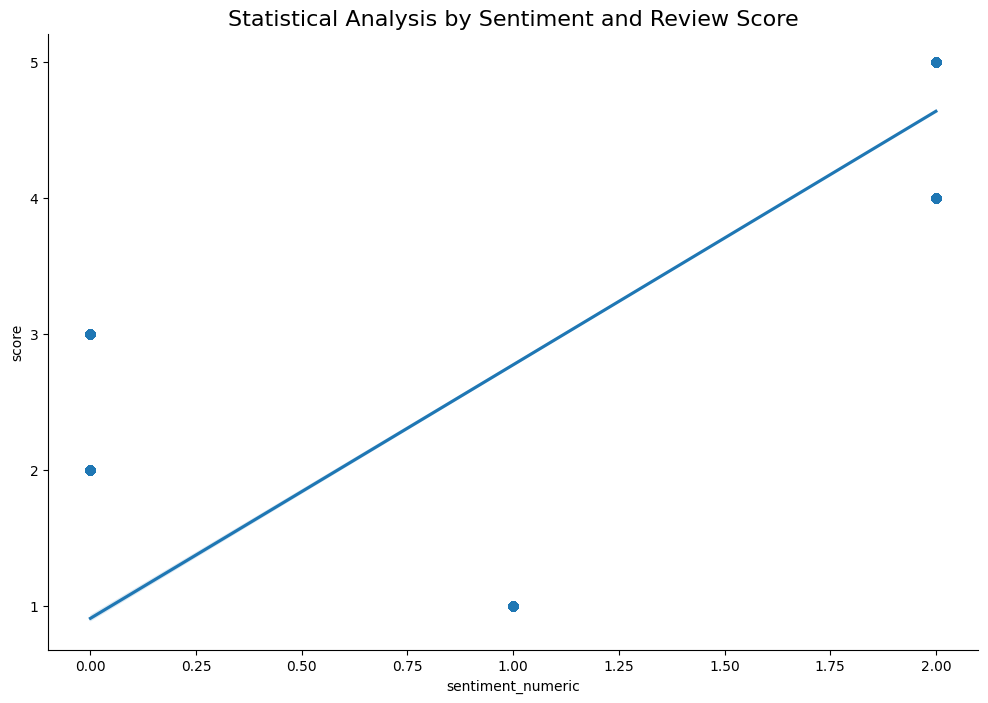

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame creation (Replace this with your actual DataFrame loading code)
# Assuming 'df_reviews' is your DataFrame with 'sentiment' and 'score'
# Convert sentiment to numeric if it's categorical
df_reviews['sentiment_numeric'] = df_reviews['sentiment'].astype('category').cat.codes

# Create the figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

# Plot regression (assuming sentiment_numeric is the numeric version of sentiment)
sns.regplot(x='sentiment_numeric', y='score', data=df_reviews, ax=ax)

# Add title and adjust plot
plt.title('Statistical Analysis by Sentiment and Review Score', fontsize=16)
sns.despine()

# Show plot
plt.show()
